In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'savefig.dpi':100})
data_folder=os.path.dirname(os.getcwd())+'/BenchmarkDatasets/'

In [98]:
raw_data={}
for auction in ['Auction', 'NoAuction']:
    raw_data[auction]={}
    for i, normalization_method in enumerate(['Zscore', 'MinMax', 'DecPre']):
        normalization_folder=data_folder+auction+'/'+str(i+1)+'.'+auction+'_'+normalization_method+'/'
        for split in ['Train', 'Test']:
            split_folder=normalization_folder+auction+'_'+normalization_method+'_'+split+'ing/'
            for j, file in enumerate(os.listdir(split_folder)):
                data = np.loadtxt(split_folder+file).astype(float).reshape(149,-1).T
                print(file, data.shape)
                if split=='Train':
                    raw_data[auction][normalization_method]=data
                    break
                else:
                    raw_data[auction][normalization_method]=np.vstack((raw_data[auction][normalization_method],data))
        print(raw_data[auction][normalization_method].shape)

Train_Dst_Auction_ZScore_CF_1.txt (47342, 149)
Test_Dst_Auction_ZScore_CF_1.txt (45114, 149)
Test_Dst_Auction_ZScore_CF_2.txt (33720, 149)
Test_Dst_Auction_ZScore_CF_3.txt (43252, 149)
Test_Dst_Auction_ZScore_CF_4.txt (41171, 149)
Test_Dst_Auction_ZScore_CF_5.txt (47253, 149)
Test_Dst_Auction_ZScore_CF_6.txt (45099, 149)
Test_Dst_Auction_ZScore_CF_7.txt (59973, 149)
Test_Dst_Auction_ZScore_CF_8.txt (57951, 149)
Test_Dst_Auction_ZScore_CF_9.txt (37250, 149)
(458125, 149)
Train_Dst_Auction_MinMax_CF_1.txt (47342, 149)
Test_Dst_Auction_MinMax_CF_1.txt (45114, 149)
Test_Dst_Auction_MinMax_CF_2.txt (33720, 149)
Test_Dst_Auction_MinMax_CF_3.txt (43252, 149)
Test_Dst_Auction_MinMax_CF_4.txt (41171, 149)
Test_Dst_Auction_MinMax_CF_5.txt (47253, 149)
Test_Dst_Auction_MinMax_CF_6.txt (45099, 149)
Test_Dst_Auction_MinMax_CF_7.txt (59973, 149)
Test_Dst_Auction_MinMax_CF_8.txt (57951, 149)
Test_Dst_Auction_MinMax_CF_9.txt (37250, 149)
(458125, 149)
Train_Dst_Auction_DecPre_CF_1.txt (47342, 149)
Tes

In [99]:
for auction in raw_data.keys():
    for normalization_method in raw_data[auction].keys():
        print(auction, normalization_method)
        data=raw_data[auction][normalization_method]
        
        break_points=np.concatenate([[0],np.nonzero(np.abs((data[:-1,0]+0.1)/(data[1:,0]+0.1)-1)>0.1)[0]+1,[len(data)]])  
        break_points=np.append(break_points[:-1][(break_points[1:]-break_points[:-1])>1000],break_points[-1])
        n_ticks=np.array([break_points[i+1]-break_points[i] for i in range(len(break_points)-1)]).reshape(10,5)
        print(n_ticks)
        print(np.sum(n_ticks), np.sum(n_ticks, axis=0), np.sum(n_ticks, axis=1))
        
        np.save(auction+'_n_ticks', n_ticks)
        
        data = data[:,list(range(40))+[144,145,147]]
        break_points = np.concatenate([[0],np.cumsum(n_ticks.flatten())])
        data = [data[break_points[i]:break_points[i+1]] for i in range(len(break_points)-1)]
        data = np.concatenate(np.array(data).reshape(10,5).T.flatten())
        np.save(auction+'_'+normalization_method, data)

Auction Zscore
[[ 3945  7590  6037 12166 17604]
 [ 5804  7600  6855  8376 16479]
 [ 4410  6601  4760  6111 11838]
 [ 3228  8080  5984 12957 13003]
 [ 3418  8009  7018  7733 14993]
 [ 2613  8078  7213  8500 20849]
 [ 3120  8613  7966 10163 15237]
 [ 2948  9688  9751 14123 23463]
 [ 2145 10603 10988 14530 19685]
 [ 2242  7353  6323  6486 14846]]
458125 [ 33873  82215  72895 101145 167997] [47342 45114 33720 43252 41171 47253 45099 59973 57951 37250]
Auction MinMax
[[ 3945  7590  6037 12166 17604]
 [ 5804  7600  6855  8376 16479]
 [ 4410  6601  4760  6111 11838]
 [ 3228  8080  5984 12957 13003]
 [ 3418  8009  7018  7733 14993]
 [ 2613  8078  7213  8500 20849]
 [ 3120  8613  7966 10163 15237]
 [ 2948  9688  9751 14123 23463]
 [ 2145 10603 10988 14530 19685]
 [ 2242  7353  6323  6486 14846]]
458125 [ 33873  82215  72895 101145 167997] [47342 45114 33720 43252 41171 47253 45099 59973 57951 37250]
Auction DecPre
[[ 3945  7590  6037 12166 17604]
 [ 5804  7600  6855  8376 16479]
 [ 4410  6601  

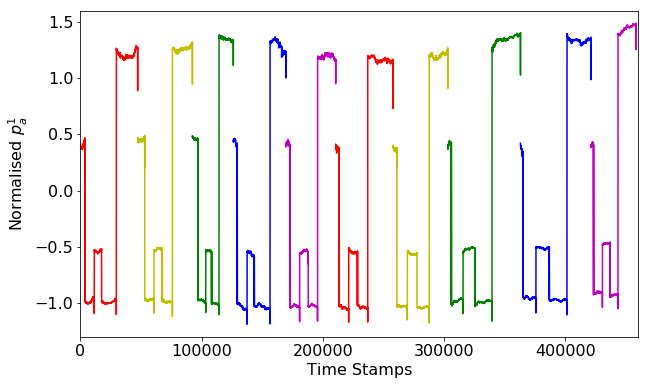

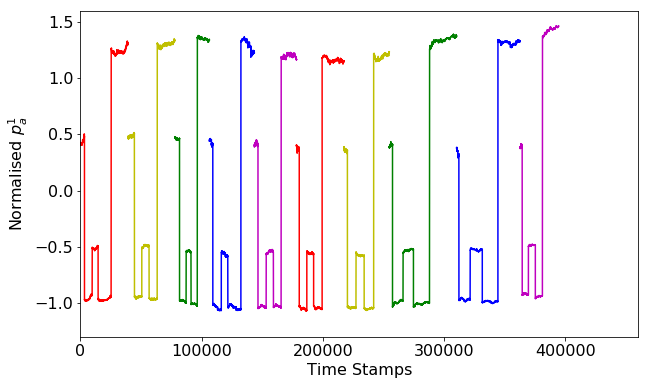

In [4]:
colors=['r', 'y', 'g', 'b', 'm']
for auction in ['Auction', 'NoAuction']:
    n_ticks=np.load(auction+'_n_ticks.npy')
    data = np.load(auction+'_Zscore.npy')
    break_points = np.concatenate([[0],np.cumsum(n_ticks.T.flatten())])
    data = [data[break_points[j]:break_points[j+1]] for j in range(len(break_points)-1)]
    data = np.concatenate(np.array(data).reshape(5,10).T.flatten())[:,0]
    
    break_points=np.concatenate([[0],np.cumsum(n_ticks.sum(axis=1))])   
    
    _=plt.figure(figsize=(10,6))
    for j in range(len(break_points)-1):
        _=plt.plot(np.arange(break_points[j],break_points[j+1]), 
                   data[break_points[j]:break_points[j+1]], color=colors[j%len(colors)])
#     _=plt.title(auction)
    _=plt.xlabel('Time Stamps')
    _=plt.ylabel(r'Normalised $p_a^1$')
    _=plt.xlim([0,460000])
    _=plt.ylim([-1.3,1.6])
    _=plt.xticks(np.arange(0,400001,100000))
    _=plt.yticks(np.arange(-1.0, 1.51, 0.5))
    _=plt.savefig(auction+'_byDay.jpg')
    _=plt.show()


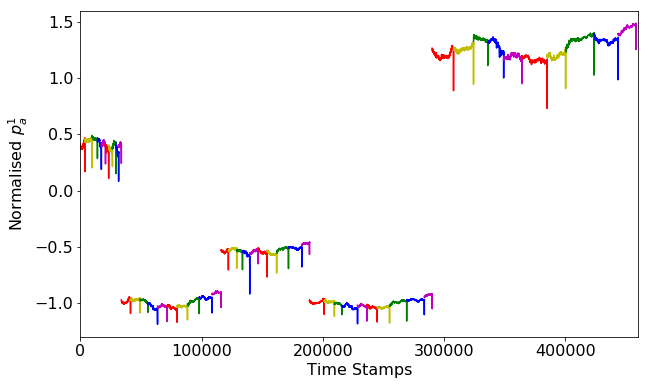

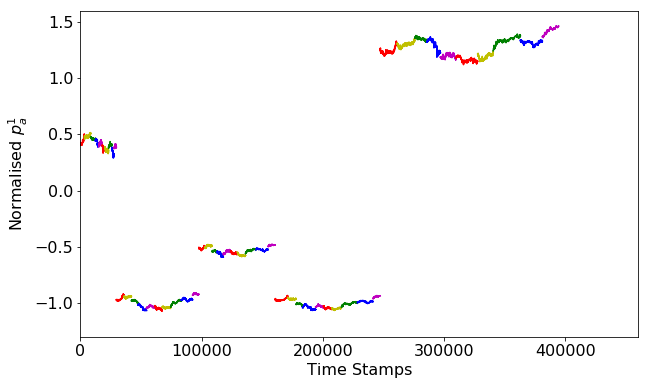

In [5]:
colors=['r', 'y', 'g', 'b', 'm']
for auction in ['Auction', 'NoAuction']:
    n_ticks=np.load(auction+'_n_ticks.npy')
    data = np.load(auction+'_Zscore.npy')[:,0]
    break_points = np.concatenate([[0],np.cumsum(n_ticks.T.flatten())])
    _=plt.figure(figsize=(10,6))
    for j in range(50):
        _=plt.plot(np.arange(break_points[j], break_points[j+1]), data[break_points[j]:break_points[j+1]], 
                   color=colors[j%len(colors)])
#     _=plt.title(auction)
    _=plt.xlabel('Time Stamps')
    _=plt.ylabel(r'Normalised $p_a^1$')
    _=plt.xlim([0,460000])
    _=plt.ylim([-1.3,1.6])
    _=plt.xticks(np.arange(0,400001,100000))
    _=plt.yticks(np.arange(-1.0, 1.51, 0.5))
    _=plt.savefig(auction+'_byStock.jpg')
    _=plt.show()

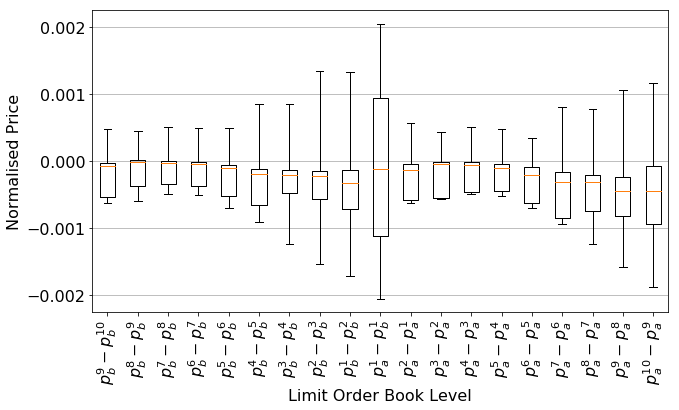

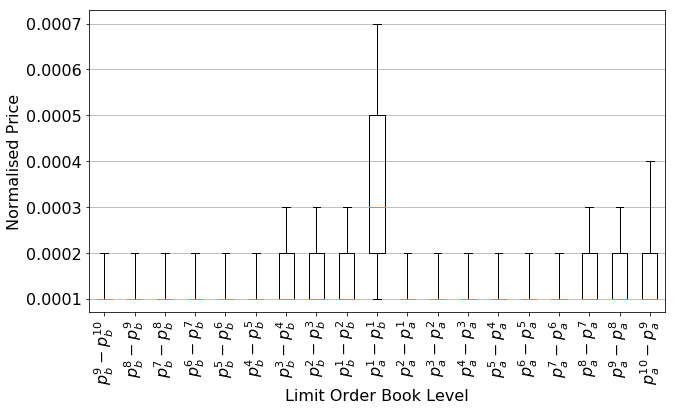

In [6]:
x_ticks=[r'$p_b^9 - p_b^{10}$', r'$p_b^8 - p_b^9$', r'$p_b^7 - p_b^8$', r'$p_b^6 - p_b^7$', r'$p_b^5 - p_b^6$',
         r'$p_b^4 - p_b^5$',  r'$p_b^3 - p_b^4$', r'$p_b^2 - p_b^3$', r'$p_b^1 - p_b^2$', r'$p_a^1 - p_b^1$',
         r'$p_a^2 - p_a^1$',  r'$p_a^3 - p_a^2$', r'$p_a^4 - p_a^3$', r'$p_a^5 - p_a^4$', r'$p_a^6 - p_a^5$',
         r'$p_a^7 - p_a^6$',  r'$p_a^8 - p_a^7$', r'$p_a^9 - p_a^8$', r'$p_a^{10} - p_a^9$']

for normalization_method in ['Zscore', 'DecPre']:
    data=np.load('NoAuction_'+normalization_method+'.npy')

    f, axes=plt.subplots(1,1,figsize=(10,6))
    f.subplots_adjust(left=0.15, bottom=0.25, right=0.95, top=0.95)
    _=plt.boxplot([data[:, 2+4*j]-data[:, 6+4*j] for j in range(9)] + [data[:,0]-data[:,2]]+ \
                    [data[:, 4+4*j]-data[:, 0+4*j] for j in range(9)], whis=[10, 90], showfliers=False)
    _=plt.grid(b=True, which='both', axis='y')
#         _=plt.gca().yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
#         _=plt.title(normalization_method)
    _=plt.xticks(range(1,20), x_ticks, rotation=90)
    _=plt.xlabel('Limit Order Book Level')
    _=plt.ylabel('Normalised Price')
    _=plt.savefig(normalization_method+'_LevelDiff.jpg')
    _=plt.show()

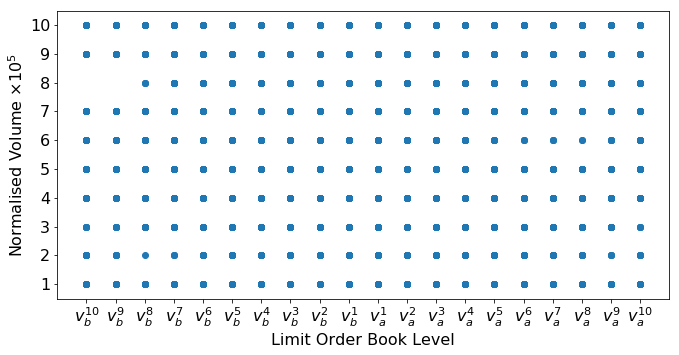

In [7]:
x_ticks=[r'$v_b^{10}$', r'$v_b^9$', r'$v_b^8$', r'$v_b^7$', r'$v_b^6$', r'$v_b^5$', r'$v_b^4$', r'$v_b^3$',
         r'$v_b^2$', r'$v_b^1$', r'$v_a^1$', r'$v_a^2$', r'$v_a^3$', r'$v_a^4$', r'$v_a^5$', r'$v_a^6$', 
         r'$v_a^7$', r'$v_a^8$', r'$v_a^9$', r'$v_a^{10}$'] 

data=np.load('NoAuction_DecPre.npy')[:, [39-4*i for i in range(10)]+[1+4*i for i in range(10)]]
f, axes=plt.subplots(1,1,figsize=(10,5))
f.subplots_adjust(left=0.1, bottom=0.15, right=0.95, top=0.95)
_=plt.xlim([-1,data.shape[1]])
_=plt.xticks(range(data.shape[1]), x_ticks)
res=np.amin(data.flatten())
_=plt.ylim([0.5*res, 10.5*res])
_=plt.yticks(np.arange(res, 11*res, res), np.arange(1,11))
_=plt.scatter(np.repeat(range(data.shape[1]), data.shape[0]), data.T.flatten())
_=plt.xlabel('Limit Order Book Level')
_=plt.ylabel('Normalised Volume '+r'$\times$'+'$10^5$')
_=plt.savefig('DecPre_MicroVolume.jpg')
_=plt.show()


In [ ]:
threshold=0.002
data = np.load('NoAuction_DecPre.npy')
midprice=(data[:,0]+data[:,2])/2
for normalization_method in ['Zscore', 'DecPre']:
    data = np.load('NoAuction_'+normalization_method+'.npy')
    for k in [1,2,5]:
        price_diff=midprice[[list(range(i+1,i+k+1)) for i in range(len(midprice)-k)]].mean(axis=1)/midprice[:-k]-1
        y_true=np.ones(len(midprice))*2
        y_true[:-k][price_diff>=(+threshold/100)]=1
        y_true[:-k][price_diff<=(-threshold/100)]=3
        data=np.hstack((data, y_true.reshape(-1,1)))
    np.save('NoAuction_'+normalization_method, data)

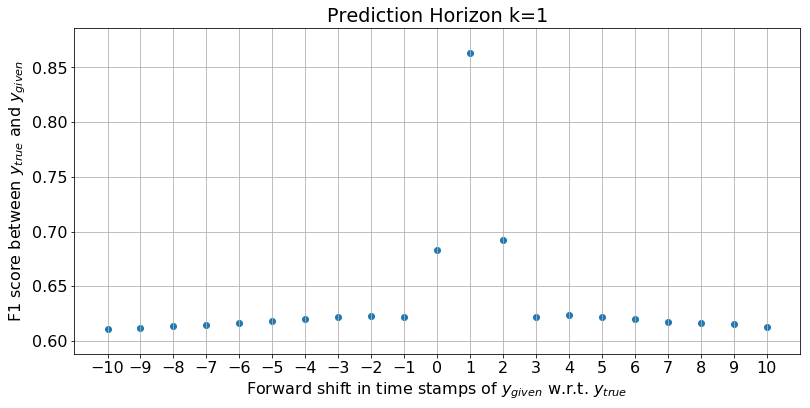

prediction horizon k= 1  shift= 1
overall precision, recall, and f1 score
(0.9063388515587902, 0.8524561479140937, 0.8632655022401412)
confusion matrix
[[ 42745    780    678]
 [ 27982 251355  27330]
 [   702    710  42055]]


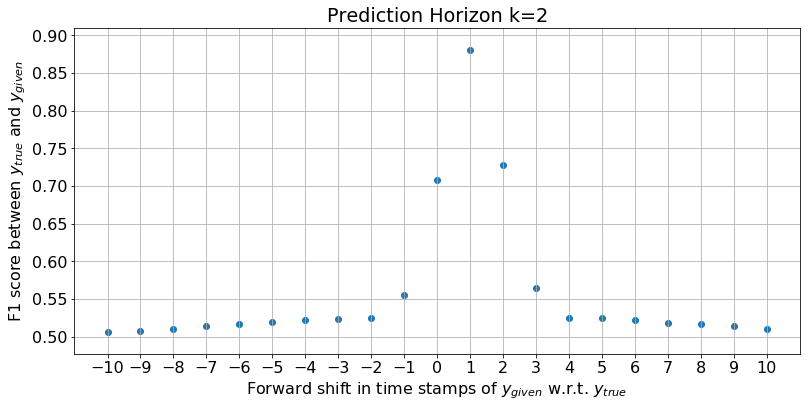

prediction horizon k= 2  shift= 1
overall precision, recall, and f1 score
(0.9000043113191033, 0.8779647864643693, 0.8808658765428025)
confusion matrix
[[ 69519   1720   1587]
 [ 20996 208979  20475]
 [  1564   1781  67716]]


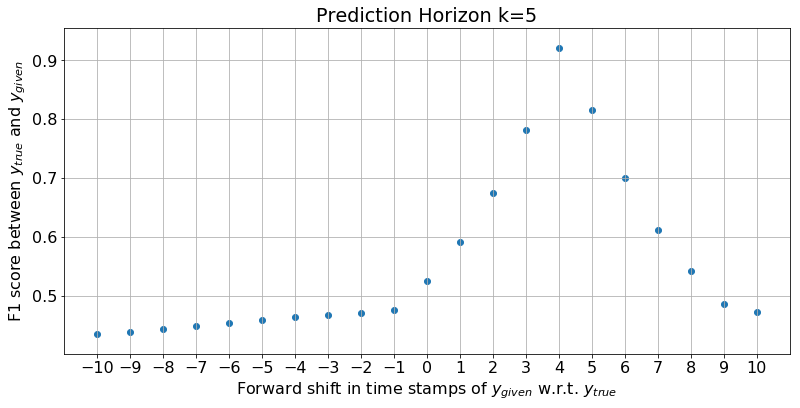

prediction horizon k= 5  shift= 4
overall precision, recall, and f1 score
(0.9213087821296374, 0.9205882278355823, 0.9204826893095751)
confusion matrix
[[114634   4390   2822]
 [  8733 138079   8453]
 [  2705   4212 110309]]


In [8]:
data = np.load('NoAuction_DecPre.npy')
for i,k in enumerate([1,2,5]):
    y_true =data[:, 43+i]
    y_given=data[:, 40+i]

    shift_range=np.arange(-10,11)
    f1_score=[precision_recall_fscore_support(np.roll(y_true, shift), y_given, average='weighted')[2] 
              for shift in shift_range]
    _=plt.figure(figsize=(13,6))
    _=plt.scatter(shift_range, f1_score)
    _=plt.xticks(shift_range)
    _=plt.xlabel(r'Forward shift in time stamps of $y_{given}$ w.r.t. $y_{true}$')
    _=plt.ylabel('F1 score between $y_{true}$ and $y_{given}$')
    _=plt.grid(b=True, which='both', axis='both')
    _=plt.title('Prediction Horizon k='+str(k))
#     _=plt.savefig('Shift_k='+str(k)+'.jpg')
    plt.show()

    shift=shift_range[(np.argmax(f1_score))]
    print('prediction horizon k=', k, ' shift=', shift)
    print('overall precision, recall, and f1 score')
    print(precision_recall_fscore_support(np.roll(y_true, shift), y_given, average='weighted')[:3])
    print('confusion matrix')
    print(confusion_matrix(np.roll(y_true, shift), y_given))


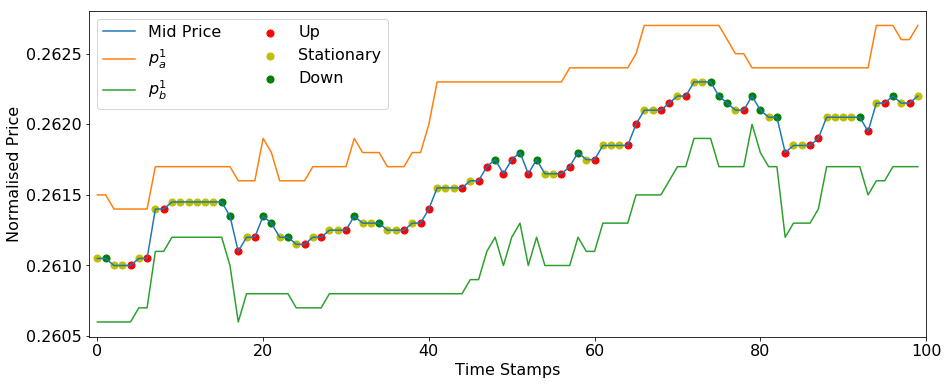

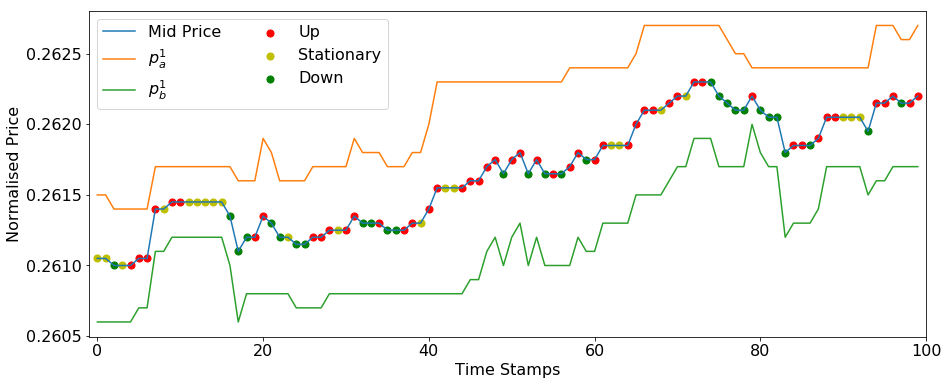

In [9]:
data=np.load('NoAuction_DecPre.npy')
pa=data[:100,0]
pb=data[:100,2]
midprice=(pa+pb)/2
y_true=data[:100,43]
y_given=data[:100,40]

for y, y_name in [(y_true, 'y_true'), (y_given, 'y_given')]:
    _=plt.figure(figsize=(15,6))
    _=plt.plot(midprice,label='Mid Price')
    _=plt.plot(pa, label='$p_a^1$')
    _=plt.plot(pb, label='$p_b^1$')
#     _=plt.title('Prediction Horizon k=1, $y_{'+y_name+'}$')
    _=plt.legend()
    _=plt.xlim([-1,100])
    _=plt.xlabel('Time Stamps')
    _=plt.ylabel('Normalised Price')
    _=plt.scatter(np.arange(100)[y==1], midprice[y==1], c='r', s=50, label='Up')
    _=plt.scatter(np.arange(100)[y==2], midprice[y==2], c='y', s=50, label='Stationary')
    _=plt.scatter(np.arange(100)[y==3], midprice[y==3], c='g', s=50, label='Down')
    _=plt.legend(ncol=2)
    _=plt.savefig(y_name+'.jpg')
    _=plt.show()

In [9]:
data=np.load('NoAuction_DecPre.npy')
for i,k in enumerate(['y1','y2','y5']):
    print( k, 'true vs given\t', np.round(np.array(precision_recall_fscore_support(data[:,43+i], data[:,40+i], average='weighted')[:3])*100, 2))

for i,k in enumerate(['y1_given', 'y2_given', 'y5_given', 'y1_true', 'y2_true', 'y5_true']):
    class_counts=np.array([np.count_nonzero(data[:,40+i]==j) for j in range(1,4)])
    class_percentage=np.round(class_counts/len(data),4)*100
    class_weights=np.round(np.amax(class_percentage)/class_percentage, 2)
    print(k, '\t', class_counts, '\t', class_percentage, '\t', class_weights)

y1 true vs given	 [73.61 64.92 68.3 ]
y2 true vs given	 [73.32 69.63 70.86]
y5 true vs given	 [52.71 52.33 52.49]
y1_given 	 [ 71429 252845  70063] 	 [18.11 64.12 17.77] 	 [3.54 1.   3.61]
y2_given 	 [ 92079 212480  89778] 	 [23.35 53.88 22.77] 	 [2.31 1.   2.37]
y5_given 	 [126072 146681 121584] 	 [31.97 37.2  30.83] 	 [1.16 1.   1.21]
y1_true 	 [ 44203 306667  43467] 	 [11.21 77.77 11.02] 	 [6.94 1.   7.06]
y2_true 	 [ 72826 250450  71061] 	 [18.47 63.51 18.02] 	 [3.44 1.   3.52]
y5_true 	 [121846 155265 117226] 	 [30.9  39.37 29.73] 	 [1.27 1.   1.32]
